# Mini Project

Research Question: What type of dogs bite people the most?
Dataset: https://catalog.data.gov/dataset/dohmh-dog-bite-data
* This is the New York City Department of Health and Mental Hygiene's dataset on dog bite statistics in the city. It documents the date of the bite, dog breed, age, gender, whether they are spayed/neutered, borough it occured, and the zipcode where it occured.
* The data occurs from 2015 to 2024
* It relates to my research question because it gives me statistics on the dogs that bit people so through data visualizations I can get a good representation that answers my research question

In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

df = pd.read_csv('s3://turner-ia340-2025-fall/DOHMH_Dog_Bite_Data.csv') # load the data from s3
df.head() #show the top 5 rows

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,1,January 01 2018,DOG,UNKNOWN,NaN,U,False,Brooklyn,11220
1,2,January 04 2018,DOG,UNKNOWN,NaN,U,False,Brooklyn,NaN
2,3,January 06 2018,DOG,Pit Bull,NaN,U,False,Brooklyn,11224
3,4,January 08 2018,DOG,Mixed/Other,4,M,False,Brooklyn,11231
4,5,January 09 2018,DOG,Pit Bull,NaN,U,False,Brooklyn,11224


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34033 entries, 0 to 34032
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UniqueID    34033 non-null  int64 
 1   DateOfBite  34033 non-null  object
 2   Species     34033 non-null  object
 3   Breed       31756 non-null  object
 4   Age         16068 non-null  object
 5   Gender      34033 non-null  object
 6   SpayNeuter  34033 non-null  bool  
 7   Borough     34033 non-null  object
 8   ZipCode     23450 non-null  object
dtypes: bool(1), int64(1), object(7)
memory usage: 2.1+ MB


In [3]:
df = df.dropna() #drop null values
df.isnull().sum() #show the number of rows containing null value

UniqueID      0
DateOfBite    0
Species       0
Breed         0
Age           0
Gender        0
SpayNeuter    0
Borough       0
ZipCode       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13604 entries, 3 to 34032
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UniqueID    13604 non-null  int64 
 1   DateOfBite  13604 non-null  object
 2   Species     13604 non-null  object
 3   Breed       13604 non-null  object
 4   Age         13604 non-null  object
 5   Gender      13604 non-null  object
 6   SpayNeuter  13604 non-null  bool  
 7   Borough     13604 non-null  object
 8   ZipCode     13604 non-null  object
dtypes: bool(1), int64(1), object(7)
memory usage: 969.8+ KB


In [14]:
df.drop_duplicates()
df.info() #duplicates dropped

<class 'pandas.core.frame.DataFrame'>
Index: 13604 entries, 3 to 34032
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   UniqueID    13604 non-null  int64  
 1   DateOfBite  13604 non-null  object 
 2   Species     13604 non-null  object 
 3   Breed       13604 non-null  object 
 4   Age         12294 non-null  float64
 5   Gender      13604 non-null  object 
 6   SpayNeuter  13604 non-null  bool   
 7   Borough     13604 non-null  object 
 8   ZipCode     13604 non-null  object 
 9   IsPuppy     13604 non-null  bool   
 10  Puppy       13604 non-null  bool   
dtypes: bool(3), float64(1), int64(1), object(6)
memory usage: 996.4+ KB


In [15]:
df.sort_values(by='DateOfBite') #sort data by date of bite

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode,IsPuppy,Puppy
16568,4183,April 01 2015,DOG,Bichon Frise,1.0,F,True,Manhattan,10022,False,False
14786,2401,April 01 2015,DOG,Chihuahua Mix,8.0,M,True,Bronx,10466,False,False
12520,138,April 01 2015,DOG,Bull Terrier,1.0,M,False,Brooklyn,11201,False,False
16606,4221,April 01 2015,DOG,Lhasa Apso,7.0,M,True,Manhattan,10002,False,False
20237,7852,April 01 2016,DOG,Pit Bull,5.0,M,False,Queens,11385,False,False
...,...,...,...,...,...,...,...,...,...,...,...
28309,2183,September 30 2023,DOG,"Bull Dog, French",NaN,M,False,Manhattan,10034,False,False
31450,1459,September 30 2024,DOG,Large Mixed Breed,7.0,M,False,Bronx,10455,False,False
32291,2300,September 30 2024,DOG,Siberian Husky,4.0,M,True,Manhattan,10028,False,False
32292,2301,September 30 2024,DOG,Cocker Spaniel,3.0,F,False,Manhattan,10031,False,False


In [16]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df_cleaned = df.dropna(subset=['Age'])
df_cleaned['Age'] = df_cleaned['Age'].astype(int)
print(df_cleaned.head())  #changed age data to integers, before it had some in years and some in months

    UniqueID       DateOfBite Species                         Breed  Age  \
3          4  January 08 2018     DOG                   Mixed/Other    4   
11        12  January 07 2018     DOG  Yorkshire Terrier Crossbreed    7   
14        15  January 09 2018     DOG                   Labradoodle    5   
18        19  January 13 2018     DOG                         Mixed    7   
20        21  January 15 2018     DOG             Poodle, Miniature    8   

   Gender  SpayNeuter   Borough ZipCode  IsPuppy  Puppy  
3       M       False  Brooklyn   11231    False  False  
11      M        True  Brooklyn   11208    False  False  
14      F        True  Brooklyn   11238    False  False  
18      M       False  Brooklyn   11237    False  False  
20      M        True  Brooklyn   11217    False  False  


In [17]:
df.sort_values(by='DateOfBite') #sort data by date of bite

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode,IsPuppy,Puppy
16568,4183,April 01 2015,DOG,Bichon Frise,1.0,F,True,Manhattan,10022,False,False
14786,2401,April 01 2015,DOG,Chihuahua Mix,8.0,M,True,Bronx,10466,False,False
12520,138,April 01 2015,DOG,Bull Terrier,1.0,M,False,Brooklyn,11201,False,False
16606,4221,April 01 2015,DOG,Lhasa Apso,7.0,M,True,Manhattan,10002,False,False
20237,7852,April 01 2016,DOG,Pit Bull,5.0,M,False,Queens,11385,False,False
...,...,...,...,...,...,...,...,...,...,...,...
28309,2183,September 30 2023,DOG,"Bull Dog, French",NaN,M,False,Manhattan,10034,False,False
31450,1459,September 30 2024,DOG,Large Mixed Breed,7.0,M,False,Bronx,10455,False,False
32291,2300,September 30 2024,DOG,Siberian Husky,4.0,M,True,Manhattan,10028,False,False
32292,2301,September 30 2024,DOG,Cocker Spaniel,3.0,F,False,Manhattan,10031,False,False


In [9]:
import re

In [18]:
def clean_breed(breed):
    if pd.isnull(breed):
        return breed
    # Remove leading numbers and extra spaces (e.g., "2 German Shepards")
    breed = re.sub(r'^\d+\s*', '', breed)
    # Remove any remaining digits anywhere in the string
    breed = re.sub(r'\d+', '', breed)
    # Standardize capitalization
    breed = breed.strip().title()
    return breed

# Apply the cleaning function to the 'Breed' column
df['Breed'] = df['Breed'].apply(clean_breed)

# Preview cleaned breeds
print(df['Breed'].value_counts().head(10))


Breed
Pit Bull                                1690
Unknown                                  733
Mixed                                    595
Shih Tzu                                 513
American Pit Bull Mix / Pit Bull Mix     481
German Shepherd                          435
Chihuahua                                353
Yorkshire Terrier                        329
Mixed Breed                              328
American Pit Bull Terrier/Pit Bull       299
Name: count, dtype: int64


In [19]:
df.sort_values(by='Breed') #sort data by breed

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode,IsPuppy,Puppy
15568,3183,July 17 2016,DOG,/Shih Tzu Mix,3.0,M,False,Bronx,10457,False,False
18198,5813,May 11 2017,DOG,African Boerboel,3.0,M,False,Manhattan,10025,False,False
33838,3847,June 13 2024,DOG,Airedale,4.0,F,False,Staten Island,10308,False,False
16997,4612,September 10 2015,DOG,Airedale Terrier,2.0,M,True,Manhattan,10011,False,False
9021,9022,December 21 2018,DOG,Airedale Terrier,8.0,M,False,Queens,11694,False,False
...,...,...,...,...,...,...,...,...,...,...,...
14407,2022,August 28 2017,DOG,Yorkshire/ Tibetan Terrier,1.0,M,True,Brooklyn,11238,False,False
15723,3338,October 07 2016,DOG,Yorkshire/Shih Tzu Mix,NaN,M,False,Bronx,10457,False,False
15174,2789,November 14 2015,DOG,Yorky-Poodle,2.0,U,False,Bronx,10453,False,False
10831,10832,May 11 2021,DOG,Zuchon,7.0,M,True,Queens,11421,False,False


In [21]:
# Convert Age to numeric (cleaning strings)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Create a new variable: Puppy
df['Puppy'] = df['Age'].apply(lambda x: True if pd.notnull(x) and x < 1 else False)

# Preview the new column
print(df[['Age', 'Puppy']].head())

# This supports my research question because dog bites could largely be contributed to whether or no the dog was a puppy, not just the breed, so this variable is an easy way to determine if being a puppy contirbutes to bites


    Age  Puppy
3   4.0  False
5   NaN  False
8   NaN  False
9   NaN  False
11  7.0  False


In [25]:
# Filter the DataFrame to show only rows where the Breed is 'Pit Bull'
filtered_df = df[df['Breed'] == 'Pit Bull']

# Display the first few rows of the filtered data
filtered_df.head()

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode,IsPuppy,Puppy
79,80,February 24 2018,DOG,Pit Bull,3.0,F,True,Brooklyn,11236,False,False
82,83,February 25 2018,DOG,Pit Bull,3.0,M,False,Brooklyn,11218,False,False
84,85,February 27 2018,DOG,Pit Bull,3.0,F,False,Brooklyn,11208,False,False
104,105,March 11 2018,DOG,Pit Bull,2.0,F,True,Brooklyn,11234,False,False
106,107,March 11 2018,DOG,Pit Bull,NaN,F,False,Brooklyn,11231,False,False


In [ ]:
df.drop(columns=['IsPuppy'], inplace=True)
df.head() # had IsPuppy and Puppy as headers so I deleted IsPuppy because it is repetitive
# already ran this code once, didn't run it again because it will not delete the column twice and will give me an error message

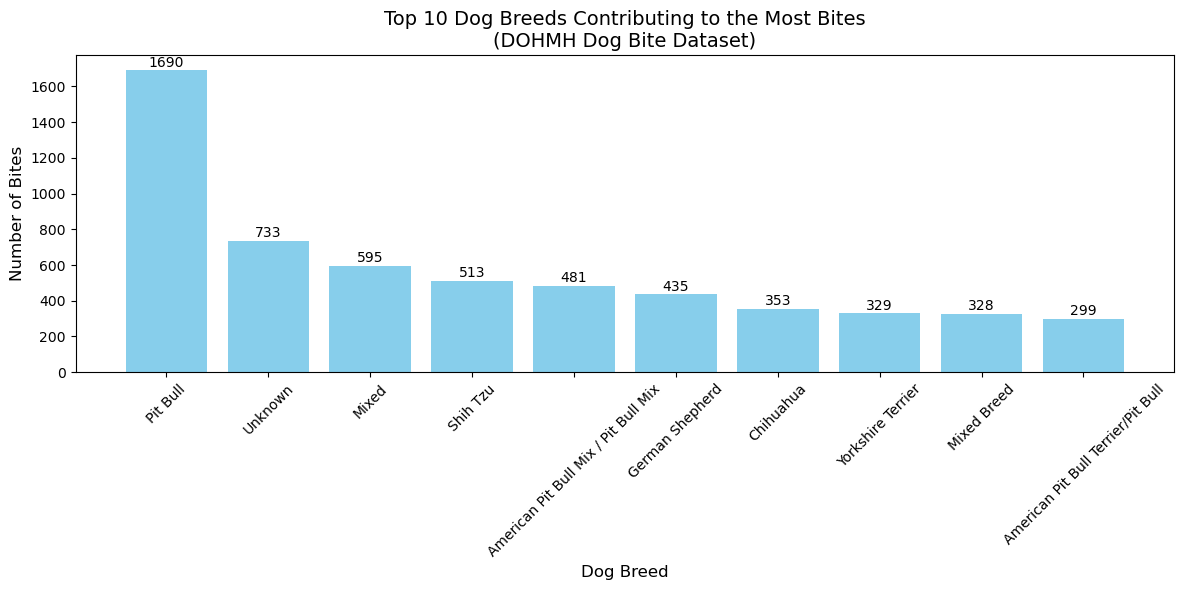

In [33]:
# Count the number of bites per breed
breed_counts = df['Breed'].value_counts().dropna().head(10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(breed_counts.index, breed_counts.values, color='skyblue')

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom')

# Title and labels
plt.title("Top 10 Dog Breeds Contributing to the Most Bites\n(DOHMH Dog Bite Dataset)", fontsize=14)
plt.xlabel("Dog Breed", fontsize=12)
plt.ylabel("Number of Bites", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

The visualization shows that pit bulls cause a significant percentage of dog bites in NYC. Originally I thought that this could be skewed because maybe a lot more people own pit bulls in NYC than other dogs. I looked this up however, and only 5-15% of dogs in NYC are pit bulls, so this data is not skewed in that way.

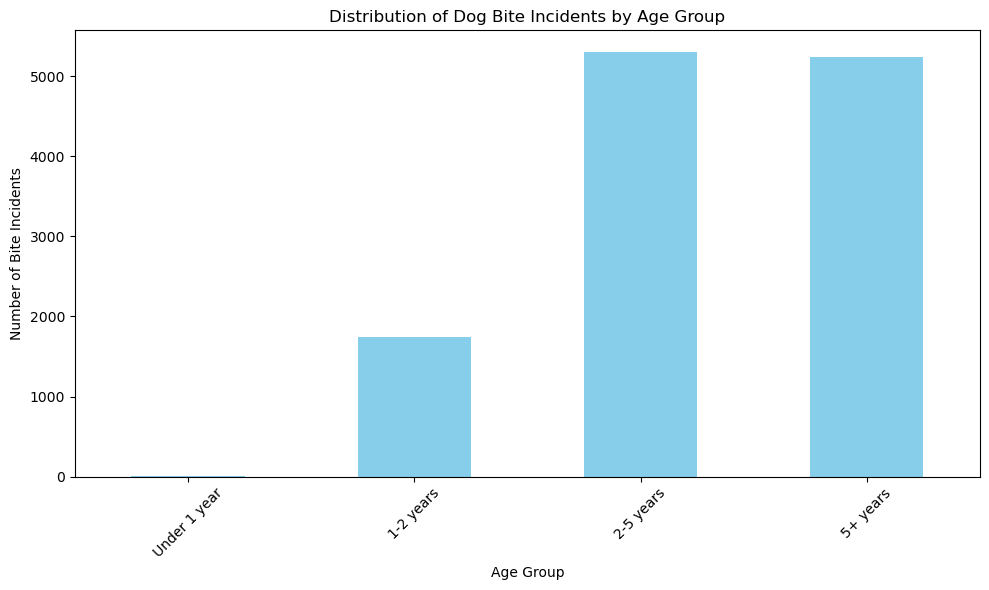

In [47]:


# Convert Age to numeric and drop missing values
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df_cleaned = df.dropna(subset=['Age'])
df_cleaned['Age'] = df_cleaned['Age'].astype(int)

# Create Puppy column
df_cleaned['Puppy'] = df_cleaned['Age'].apply(lambda x: True if x < 1 else False)

# Define age groups using Puppy column
age_groups = []
for _, row in df_cleaned.iterrows():
    if row['Puppy'] == True:
        age_groups.append('Under 1 year')
    elif row['Age'] < 2:
        age_groups.append('1-2 years')
    elif row['Age'] < 5:
        age_groups.append('2-5 years')
    else:
        age_groups.append('5+ years')

# Add AgeGroup column
df_cleaned['AgeGroup'] = age_groups

# Count number of bites per age group
age_group_counts = df_cleaned['AgeGroup'].value_counts().reindex(['Under 1 year', '1-2 years', '2-5 years', '5+ years'])

# Plot the bar chart
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Dog Bite Incidents by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Bite Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


I can not get it to work where it shows data for under 1 year puppies, so it can not be confirmed if puppies under 1 year contribute to a signifcant number of bites. However, this can be assumed to be not true because the 1-2 year age group is proporionately small when compared to other age grops